In [34]:
import spot, buddy
spot.setup()

# Illustrating synthesis

In [35]:
# First we need a specification, let's go with something classical
# I = {req}, O = {grant}
spec = "(GF(req) && G(req -> X(~req))) -> (G(req -> (X(grant || X(grant)))))"

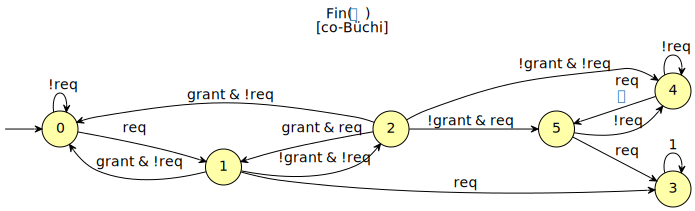

In [36]:
# Then we need to translate it, we want a deterministic parity automaton
aut = spot.translate(spec, "deterministic", "parity")
spot.change_parity_here(aut, spot.parity_kind_max, spot.parity_style_odd)
aut

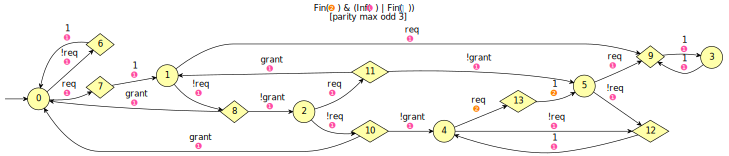

In [37]:
# Now we need to make it a game
outs = buddy.bdd_ithvar(aut.register_ap("grant"))
auts = spot.split_2step(aut, outs, True) # The last True one is for input complete -> Why?
spot.colorize_parity_here(auts, True)
auts

True


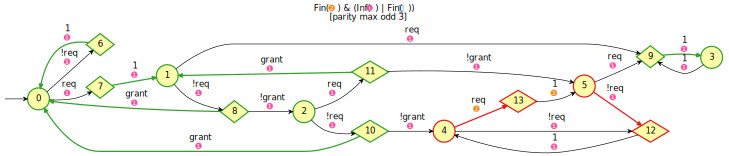

In [38]:
# Let us solve it
is_real = spot.solve_game(auts)
print(is_real)
if (is_real):
    spot.highlight_strategy(auts)
auts

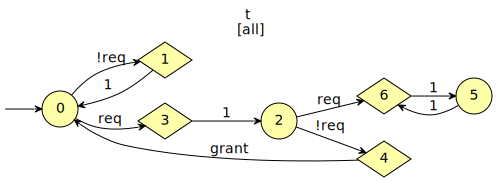

In [39]:
# Only keep the usefull part
mm = spot.solved_game_to_split_mealy(auts)
mm

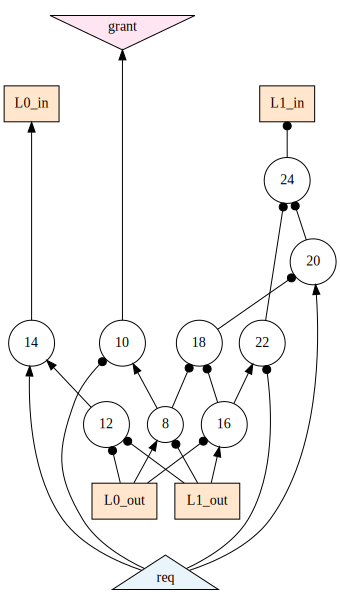

In [42]:
# You can even convert it into a AIG, an electrical circuit only composed of and-gates, inverters and latches
aig = spot.mealy_machine_to_aig(mm, "ite")
aig